In [19]:
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')

from soundscape_viewer import lts_viewer
from soundscape_viewer import gdrive_handle
from source_separation import pcnmf
from soundscape_viewer import data_organize
from source_separation import source_separation
from utility import matrix_operation
import interactive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [21]:
LTS=lts_viewer(path='./..')
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100, 48000])#

Loading file: Taoyuan_081811-090220-30min.pkl
(744, 48000)
(744, 47901)


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_39703/1677777421.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('jet', len(percentile))


(1, 48000)

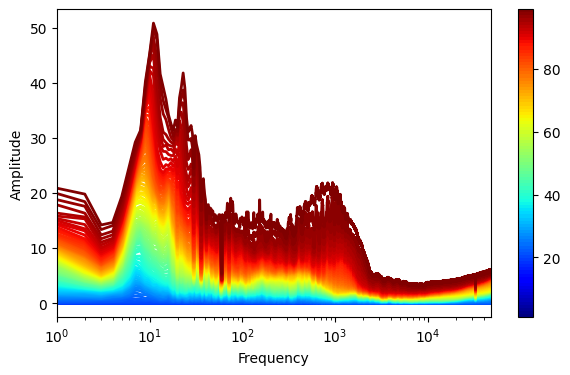

In [18]:
percentile=np.arange(1,100)
PSD_dist= np.percentile(input_data, percentile, axis=0)

fig, ax = plt.subplots(figsize=(7, 4))
cmap=cm.get_cmap('jet', len(percentile))
cmap_table=cmap(range(len(percentile)))

c = np.arange(1, len(percentile) + 1)
cbar = plt.scatter(c, c, c=c, cmap=cmap)
plt.colorbar( ticks=range(0,102,20))
ax.cla()

for n in np.arange(len(percentile)):
    plt.plot(f, PSD_dist[n,:], color=cmap_table[n,:], linewidth=2)

plt.xscale('log')

# plt.ylim(np.min(amplitude_range), np.max(amplitude_range))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(1,48000)




(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

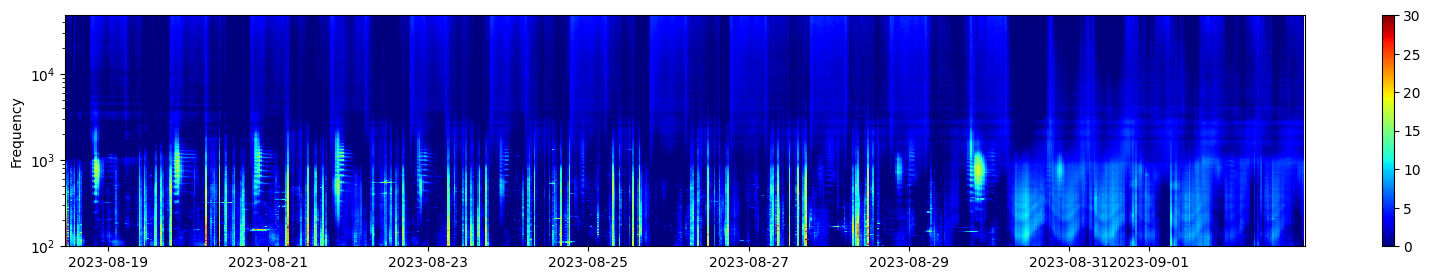

In [23]:
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=30, fig_width=20, fig_height=3, lts=False)

In [ ]:
source_num = 3
model=pcnmf(feature_length=6, basis_num=20, alpha=0.1,  sparseness=0.3)  #
_, _, _ = model.unsupervised_separation(input_data, f, time, source_num=source_num)


In [ ]:
save = False
if save:
    pcnmf.save_model(model, filename='PCNMF_model.mat', path='../Results/soundsepration')
    
for n in range(1, source_num+1):
    model.plot_pcnmf(source = n, savefig = save, log = True) #freq_range=[0,25000]) 
    print()
    

### Clustering

In [ ]:
# Use K-means clustering to investigate soundscape structure
from soundscape_viewer import clustering

source=1 # Choose the source number

cluster_result=clustering(k=6, pca_percent=0.9)

# Run clustering on separated source #1
cluster_result.run(input_data=model.separation[source-1],f=f)